<a href="https://colab.research.google.com/github/mykirk98/Artificial_Intelligence_Drills/blob/main/finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!unzip data-19.zip

Archive:  data-19.zip
   creating: test/
   creating: test/ad/
  inflating: test/ad/ad_test_1.jpg   
  inflating: test/ad/ad_test_10.jpg  
  inflating: test/ad/ad_test_11.jpg  
  inflating: test/ad/ad_test_12.jpg  
  inflating: test/ad/ad_test_13.jpg  
  inflating: test/ad/ad_test_14.jpg  
  inflating: test/ad/ad_test_15.jpg  
  inflating: test/ad/ad_test_16.jpg  
  inflating: test/ad/ad_test_17.jpg  
  inflating: test/ad/ad_test_18.jpg  
  inflating: test/ad/ad_test_19.jpg  
  inflating: test/ad/ad_test_2.jpg   
  inflating: test/ad/ad_test_20.jpg  
  inflating: test/ad/ad_test_21.jpg  
  inflating: test/ad/ad_test_22.jpg  
  inflating: test/ad/ad_test_23.jpg  
  inflating: test/ad/ad_test_24.jpg  
  inflating: test/ad/ad_test_25.jpg  
  inflating: test/ad/ad_test_26.jpg  
  inflating: test/ad/ad_test_27.jpg  
  inflating: test/ad/ad_test_28.jpg  
  inflating: test/ad/ad_test_29.jpg  
  inflating: test/ad/ad_test_3.jpg   
  inflating: test/ad/ad_test_30.jpg  
  inflating: test/ad/ad_t

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, width_shift_range = 0.1,
                                   height_shift_range = 0.1)
train_generator = train_datagen.flow_from_directory('./train/',  target_size = (150, 150), batch_size = 5,
                                                    class_mode = 'binary')

Found 160 images belonging to 2 classes.


In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('./test/', target_size=(150,150), batch_size=5, class_mode='binary')

Found 120 images belonging to 2 classes.


In [20]:
transfer_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (150,150,3))
transfer_model.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [21]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 activation_1 (Activation)   (None, 1)                 0

In [23]:
finetune_model.compile(loss = 'binary_crossentropy', optimizer = optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

In [24]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [25]:
history = finetune_model.fit(train_generator, epochs = 20, validation_data=test_generator, validation_steps=10,
                    callbacks = [early_stopping_callback])

Epoch 1/20
32/32 [==============================] - 13s 48ms/step - loss: 0.7017 - accuracy: 0.5312 - val_loss: 0.6232 - val_accuracy: 0.5400
Epoch 2/20
32/32 [==============================] - 1s 41ms/step - loss: 0.5641 - accuracy: 0.6938 - val_loss: 0.5220 - val_accuracy: 0.7400
Epoch 3/20
32/32 [==============================] - 1s 41ms/step - loss: 0.5169 - accuracy: 0.7125 - val_loss: 0.4763 - val_accuracy: 0.8200
Epoch 4/20
32/32 [==============================] - 1s 41ms/step - loss: 0.4771 - accuracy: 0.7875 - val_loss: 0.3971 - val_accuracy: 0.9000
Epoch 5/20
32/32 [==============================] - 1s 41ms/step - loss: 0.4318 - accuracy: 0.8562 - val_loss: 0.3630 - val_accuracy: 0.8800
Epoch 6/20
32/32 [==============================] - 1s 42ms/step - loss: 0.3429 - accuracy: 0.9062 - val_loss: 0.3256 - val_accuracy: 0.9200
Epoch 7/20
32/32 [==============================] - 1s 44ms/step - loss: 0.3334 - accuracy: 0.8875 - val_loss: 0.3236 - val_accuracy: 0.9000
Epoch 8/20
3

In [26]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

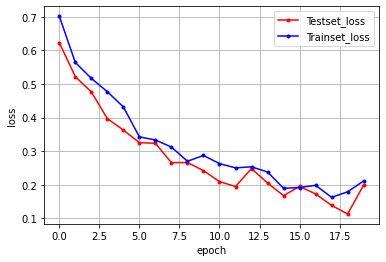

In [28]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()